In [7]:
import utils.data_loaders as data_loaders
import utils.timetagger
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file = "data/TERm1010.ttbin"
m = 2
(p, s) = utils.timetagger.get_correlator_architecture(alpha=7, m=m, tau_max=1e-2, t0=1e-12)
loader = data_loaders.DataLoaderTimeTagger(
    file,
    integration_time=30e-3,
    channels=[1],
    n_events=int(1e5),
    p=p,
    m=m,
    s=s,
    tau_start=1e-7
)
loader.load_data()

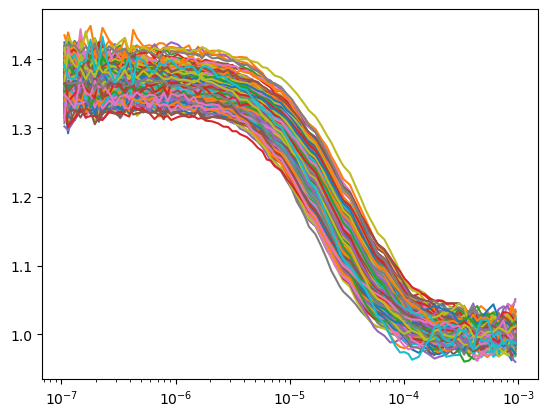

(93, 300)

In [20]:
g2_norm = np.mean(loader.g2_norm, axis=-1)
mask = np.logical_and(loader.tau > 1e-7, loader.tau < 1e-3)
tau = loader.tau[mask]
g2_norm = g2_norm[mask]
plt.semilogx(tau, g2_norm)
plt.show()

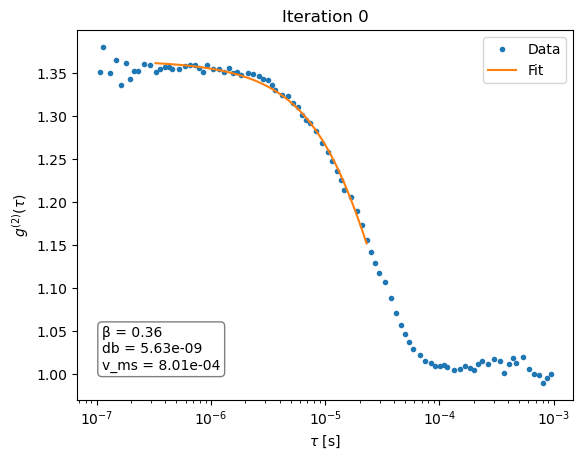

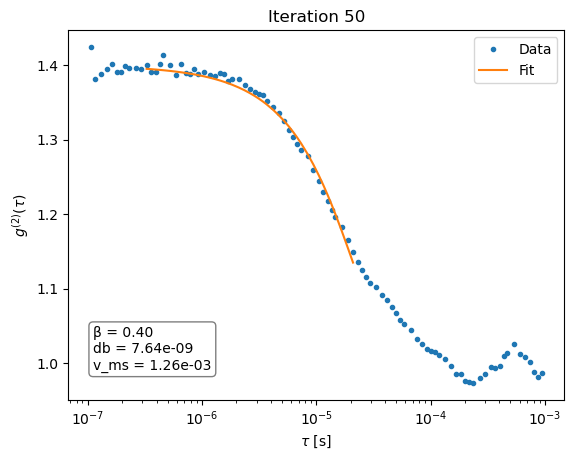

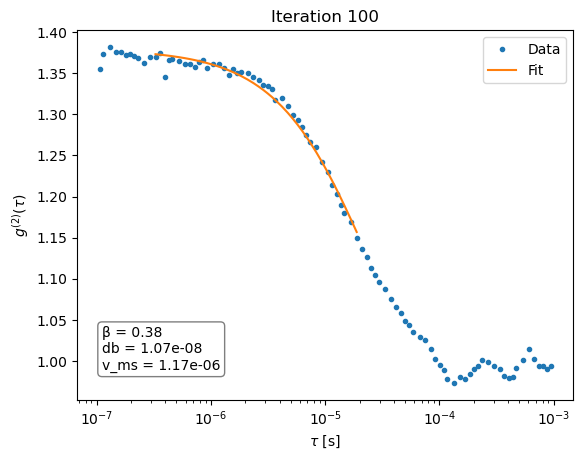

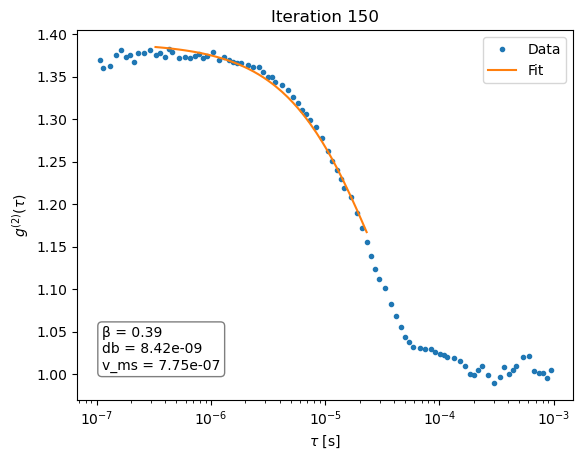

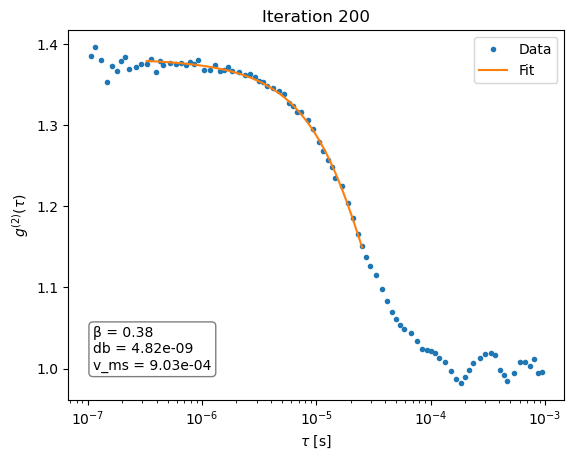

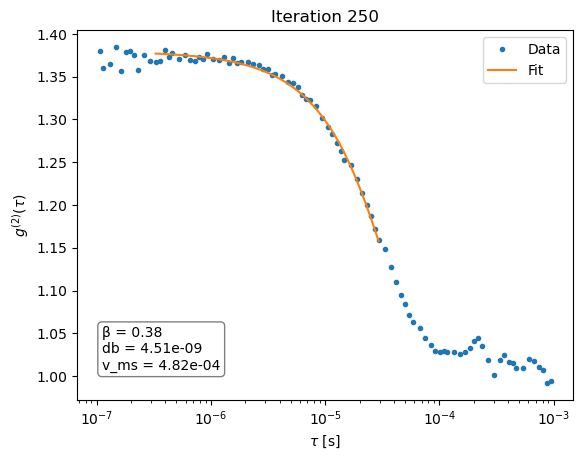

,db,v_ms,beta
0,5.629671e-09,8.012609e-04,0.364393
1,6.390282e-09,8.819086e-04,0.386922
2,9.631602e-09,9.987441e-07,0.394912
3,7.984474e-09,1.134646e-03,0.393433
4,6.865400e-09,1.778164e-03,0.340775
...,...,...,...
295,9.542421e-09,9.427850e-07,0.366469
296,7.772160e-09,9.753084e-04,0.356451
297,9.107732e-09,8.756812e-07,0.378344
298,7.041094e-09,3.534997e-04,0.386194


In [26]:
import inverse.fit_homogeneous as fit_hom
import forward.homogeneous_semi_inf as hsi

#beta_calculator =  fit_hom.BetaCalculator(mode="fixed", beta_fixed=0.50)
#beta_calculator = fit_hom.BetaCalculator(mode="raw", tau_lims=(1e-7, 2e-7))
#beta_calculator = fit_hom.BetaCalculator(mode="raw_weighted", tau_lims=(5e-7, 1e-6), beta0=0.50)
beta_calculator = fit_hom.BetaCalculator(mode="fit", beta_init=0.35, beta_bounds=(0.33, 0.4))
#msd_model = fit_hom.MSDModelFit(model_name="brownian", param_init={"db": 1e-8}, param_bounds={"db": (0, None)})
#msd_model = fit_hom.MSDModelFit(model_name="ballistic", param_init={"v_ms": 1e-4}, param_bounds={"v_ms": (0, None)})
msd_model = fit_hom.MSDModelFit(model_name="hybrid", param_init={"db": 1e-8, "v_ms": 1e-6}, param_bounds={"db": (0, None), "v_ms": (0, None)})
fitter = fit_hom.FitHomogeneous(
    tau,
    g2_norm,
    hsi.g1_norm,
    msd_model,
    beta_calculator,
    tau_lims_fit=(3e-7, 8e-4),
    g2_lim_fit=1.13,
    mua=0.1,
    musp=10,
    rho=2.5,
    n=1.4,
    lambda0=785
)

fitted_data = fitter.fit(plot_interval=50)
fitted_data
